<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/pytorch_celsius_fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Early stopping at epoch 855, loss: 8.20855493657291e-05
1000
tensor([1.8055, 3.1844])
tensor([ 32.0000,  50.0000,  68.0000,  86.0000, 104.0000])
tensor([ 31.8444,  49.8990,  67.9536,  86.0081, 104.0627])


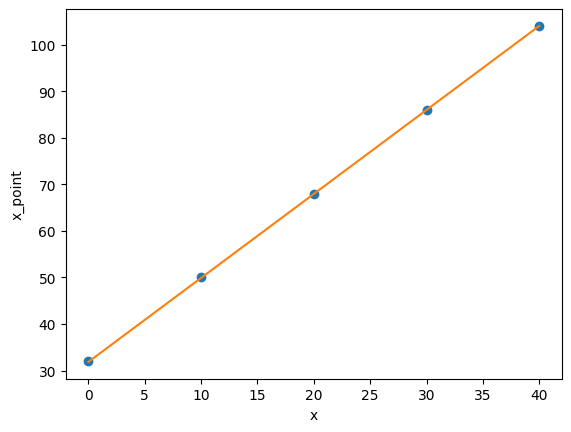

In [76]:
import torch
import matplotlib.pyplot as plt

x = torch.tensor([0.0, 10.0, 20.0, 30.0, 40.0])
x_point = torch.tensor([32.0, 50.0, 68.0, 86.0, 104.0])

x*=0.1
x_point*=0.1

def model(x, w, b):
    return w * x + b

def loss_fn(y, x_point):
    squared_diffs = (y - x_point)**2
    return squared_diffs.mean()

def dloss_fn(y, x_point):
    dsq_diffs = 2 * (y - x_point) / y.size(0)
    return dsq_diffs

def dmodel_dw(x, w, b):
    return x

def dmodel_db(x, w, b):
    return 1.0

def grad_fn(x, x_point, y, w, b):
    dloss_dtp = dloss_fn(y, x_point)
    dloss_dw = dloss_dtp * dmodel_dw(x, w, b)
    dloss_db = dloss_dtp * dmodel_db(x, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

def training_loop(n_epochs, learning_rate, params, x, x_point, tolerance):
    previous_loss = float('inf')
    for epoch in range(1, n_epochs + 1):
        w, b = params
        y = model(x, w, b)
        loss = loss_fn(y, x_point)
        if not torch.isfinite(loss).all():
            print('infinite')
            break
        grad = grad_fn(x, x_point, y, w, b)
        params = params - learning_rate * grad
        if abs(loss - previous_loss) < tolerance:
            print(f"Early stopping at epoch {epoch}, loss: {loss.item()}")
            break
        previous_loss = loss
    print(n_epochs)
    return params


c = training_loop(
    n_epochs = 1000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    x = x,
    x_point = x_point,
    tolerance=1e-6)


print(c)

y = model(x, *c)

x/=0.1
x_point/=0.1
y/=0.1

print(x_point)
print(y) # почти температура в фаренгейтах


plt.xlabel("x")
plt.ylabel("x_point")
plt.plot(x.numpy(), x_point.numpy(), 'o')
plt.plot(x.numpy(), y.numpy())
plt.show()